In [3]:
!pip install pandas numpy matplotlib seaborn




Defaulting to user installation because normal site-packages is not writeable
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.9 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 3.6 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 4.6 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.9 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.2 MB/s  0:00:01
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   -------- -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Program Files\Python314\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

dxy = pd.read_csv("../data/raw/dxy.csv")
dxy.head()



,Date,Price,Open,High,Low,Vol.,Change %
0,12-12-2025,98.40,98.32,98.53,98.30,NaN,0.05%
1,11-12-2025,98.35,98.56,98.76,98.13,0.00K,-0.45%
2,10-12-2025,98.79,99.21,99.26,98.59,0.00K,-0.44%
3,09-12-2025,99.22,99.05,99.31,98.95,0.00K,0.13%
4,08-12-2025,99.09,98.97,99.23,98.79,0.00K,0.10%


In [19]:
dxy.sort_values('Date', inplace=True)
dxy.reset_index(drop=True, inplace=True)




In [21]:
dxy.head()






,Date,DXY
0,2015-01-12,91.98
1,2015-01-13,92.31
2,2015-01-14,92.16
3,2015-01-15,92.35
4,2015-01-16,92.52


In [22]:

dxy.dtypes



Date    datetime64[us]
DXY            float64
dtype: object

In [23]:
gold = pd.read_csv("../data/raw/gold_prices.csv")
gold.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,2026-01-02,135793,136143,137037,135525,51877,0.02
1,2026-01-01,135771,135687,135850,135001,14622,0.23
2,2025-12-31,135454,136526,136527,134866,59050,1.10
3,2025-12-30,133974,133185,134880,132853,36733,1.04
4,2025-12-29,132595,137628,138269,131695,90640,-3.77


In [5]:

import sys
print(sys.executable)



c:\Program Files\Python313\python.exe


In [24]:
gold.columns


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')

In [25]:
gold.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,2026-01-02,135793,136143,137037,135525,51877,0.02
1,2026-01-01,135771,135687,135850,135001,14622,0.23
2,2025-12-31,135454,136526,136527,134866,59050,1.10
3,2025-12-30,133974,133185,134880,132853,36733,1.04
4,2025-12-29,132595,137628,138269,131695,90640,-3.77


In [26]:
gold = gold[['Date', 'Price']]
gold.rename(columns={'Price': 'Gold_USD'}, inplace=True)
gold.head()


,Date,Gold_USD
0,2026-01-02,135793
1,2026-01-01,135771
2,2025-12-31,135454
3,2025-12-30,133974
4,2025-12-29,132595


In [27]:
gold['Date'] = pd.to_datetime(gold['Date'])



In [28]:
gold.sort_values('Date', inplace=True)
gold.reset_index(drop=True, inplace=True)



In [29]:
gold.dtypes



Date        datetime64[us]
Gold_USD             int64
dtype: object

In [30]:
print(gold.head())
print(dxy.head())


        Date  Gold_USD
0 2014-01-01     29542
1 2014-01-02     29975
2 2014-01-03     29727
3 2014-01-04     29279
4 2014-01-06     29119
        Date    DXY
0 2015-01-12  91.98
1 2015-01-13  92.31
2 2015-01-14  92.16
3 2015-01-15  92.35
4 2015-01-16  92.52


In [31]:
gold = gold[gold['Date'] >= '2015-01-01']
gold.reset_index(drop=True, inplace=True)

gold.head()


,Date,Gold_USD
0,2015-01-01,26586
1,2015-01-02,26700
2,2015-01-05,26847
3,2015-01-06,27385
4,2015-01-07,27159


In [32]:
merged = pd.merge(gold, dxy, on='Date', how='inner')
merged.head()


,Date,Gold_USD,DXY
0,2015-01-12,27032,91.98
1,2015-01-13,27071,92.31
2,2015-01-14,27210,92.16
3,2015-01-15,27493,92.35
4,2015-01-16,27673,92.52


In [33]:
merged.to_csv("../data/processed/final_dataset.csv", index=False)



In [7]:

df.dtypes

Price       int64
Open        int64
High        int64
Low         int64
Volume      int64
Chg%      float64
dtype: object

In [8]:
df.isnull().sum()


Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

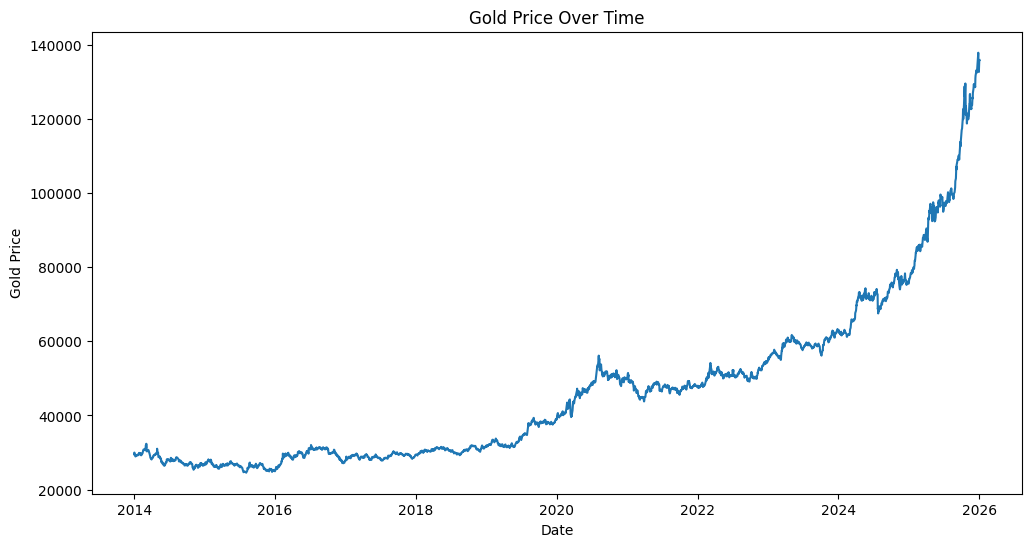

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Price'])
plt.title("Gold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.show()


In [10]:
df.to_csv("../data/data/processed/gold_cleaned.csv")


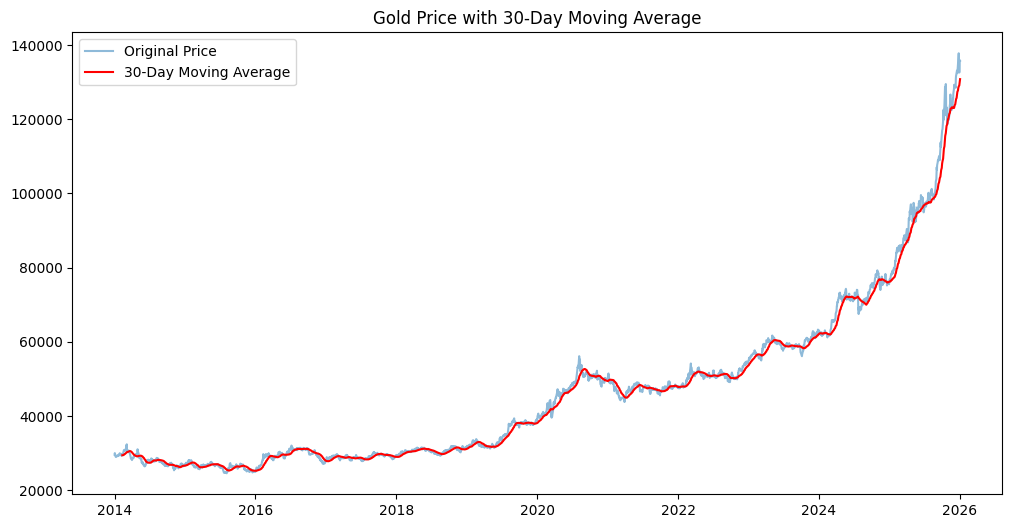

In [11]:
df['MA_30'] = df['Price'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Original Price', alpha=0.5)
plt.plot(df['MA_30'], label='30-Day Moving Average', color='red')
plt.legend()
plt.title("Gold Price with 30-Day Moving Average")
plt.show()
